In [1]:
import pandas as pd

# Load datasets
mental_illness_prevalence = pd.read_csv('mental-illnesses-prevalence.csv')
burden_disease = pd.read_csv('2- burden-disease-from-each-mental-illness(1).csv')
major_depression_prevalence = pd.read_csv('3- adult-population-covered-in-primary-data-on-the-prevalence-of-major-depression.csv')
mental_illnesses_coverage = pd.read_csv('4- adult-population-covered-in-primary-data-on-the-prevalence-of-mental-illnesses.csv')
anxiety_disorders_treatment_gap = pd.read_csv('5- anxiety-disorders-treatment-gap.csv')
depressive_symptoms_us_population = pd.read_csv('6- depressive-symptoms-across-us-population.csv')
countries_with_primary_data = pd.read_csv('7- number-of-countries-with-primary-data-on-prevalence-of-mental-illnesses-in-the-global-burden-of-disease-study.csv')



In [2]:
# Display the first few rows of each dataset
print(mental_illness_prevalence.head())
print(burden_disease.head())
print(major_depression_prevalence.head())
print(mental_illnesses_coverage.head())
print(anxiety_disorders_treatment_gap.head())
print(depressive_symptoms_us_population.head())
print(countries_with_primary_data.head())

# Basic data cleaning
def preprocess_data(df):
    df.dropna(inplace=True)  # Remove missing values
    df.columns = df.columns.str.strip()  # Remove leading/trailing whitespace from column names
    return df

mental_illness_prevalence = preprocess_data(mental_illness_prevalence)
burden_disease = preprocess_data(burden_disease)
major_depression_prevalence = preprocess_data(major_depression_prevalence)
mental_illnesses_coverage = preprocess_data(mental_illnesses_coverage)
anxiety_disorders_treatment_gap = preprocess_data(anxiety_disorders_treatment_gap)
depressive_symptoms_us_population = preprocess_data(depressive_symptoms_us_population)
countries_with_primary_data = preprocess_data(countries_with_primary_data)


        Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           0.223206                                   
1                                           0.222454                                   
2                                           0.221751                                   
3                                           0.220987                                   
4                                           0.220183                                   

   Depressive disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           4.996118                                
1                                           4.989290                                
2                                        

In [7]:
df=pd.read_csv('mental-illnesses-prevalence.csv')
df.head()

Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           0.223206                                   
1                                           0.222454                                   
2                                           0.221751                                   
3                                           0.220987                                   
4                                           0.220183                                   

   Depressive disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           4.996118                                
1                                           4.989290                                
2                                           4.981346                                
3                                           4.976958                                
4                                           4.977782                                

   Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           4.713314                             
1                                           4.702100                             
2                                           4.683743                             
3                                           4.673549                             
4                                           4.670810                             

   Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized  \
0                                           0.703023                             
1                                           0.702069                             
2                                           0.700792                             
3                                           0.700087                             
4                                           0.699898                             

   Eating disorders (share of population) - Sex: Both - Age: Age-standardized  
0                                           0.127700                           
1                                           0.123256                           
2                                           0.118844                           
3                                           0.115089                           
4                                           0.111815

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of Depressive disorders prevalence
plt.figure(figsize=(10, 6))
sns.histplot(mental_illness_prevalence['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'], bins=30, kde=True)
plt.title('Distribution of Depressive Disorders Prevalence')
plt.xlabel('Prevalence')
plt.ylabel('Frequency')
plt.show()



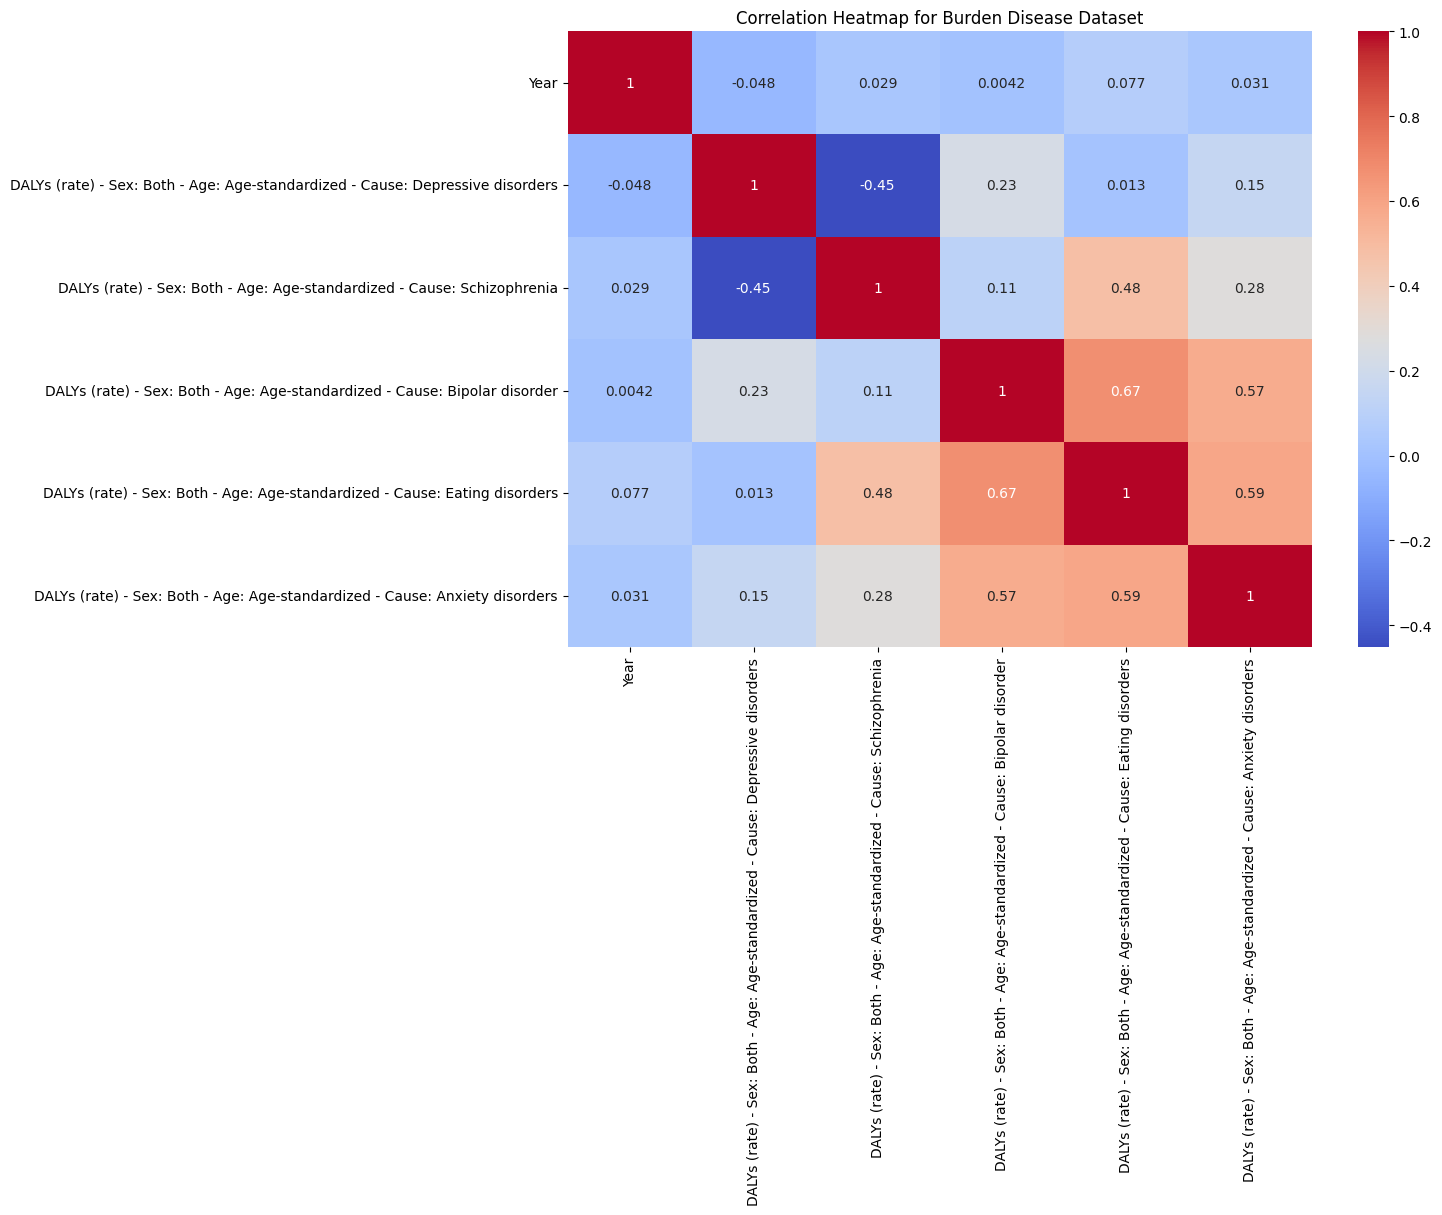

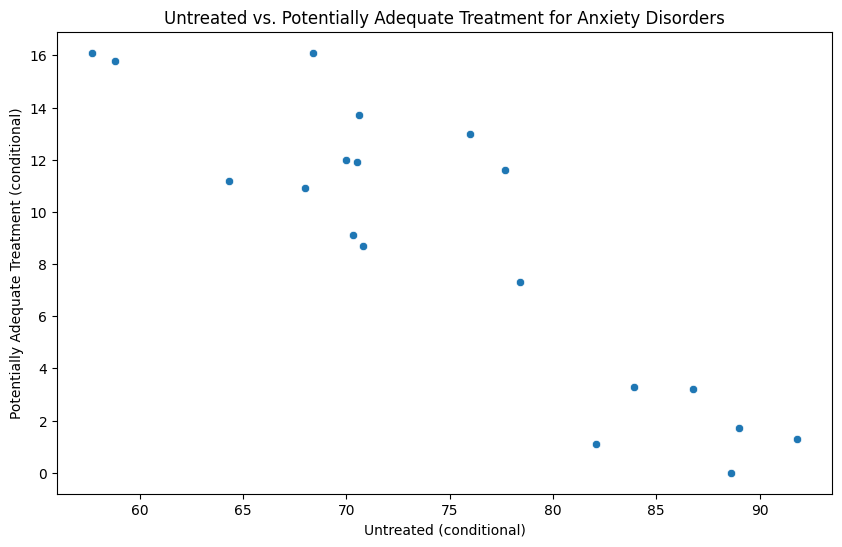

In [8]:
# Select only numeric columns for the correlation heatmap
numeric_columns = burden_disease.select_dtypes(include='number').columns

# Correlation heatmap for burden disease dataset
plt.figure(figsize=(12, 8))
sns.heatmap(burden_disease[numeric_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Burden Disease Dataset')
plt.show()

# Scatter plot of untreated vs. potentially adequate treatment for anxiety disorders
plt.figure(figsize=(10, 6))
sns.scatterplot(x=anxiety_disorders_treatment_gap['Untreated, conditional'], y=anxiety_disorders_treatment_gap['Potentially adequate treatment, conditional'])
plt.title('Untreated vs. Potentially Adequate Treatment for Anxiety Disorders')
plt.xlabel('Untreated (conditional)')
plt.ylabel('Potentially Adequate Treatment (conditional)')
plt.show()


In [22]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R^2 Score: {r2_rf}")


Random Forest - Mean Squared Error: 0.9418459618492462
Random Forest - R^2 Score: -0.007455459138175247


In [26]:
#Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Depressive Disorders Prevalence')
plt.show()

In [27]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the model
svr_model = SVR(kernel='rbf')

# Train the model
svr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluate the model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"SVR - Mean Squared Error: {mse_svr}")
print(f"SVR - R^2 Score: {r2_svr}")


SVR - Mean Squared Error: 0.9540562364131373
SVR - R^2 Score: -0.020516308008637463


In [29]:
 #Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Depressive Disorders Prevalence')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select numeric features and target variable
features = ['Year']
target = 'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'

# Preprocessing: Convert categorical variables to numeric
mental_illness_prevalence = pd.get_dummies(mental_illness_prevalence, columns=['Entity'])

# Split data into training and testing sets
X = mental_illness_prevalence[features]
y = mental_illness_prevalence[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


In [15]:
# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Depressive Disorders Prevalence')
plt.show()


Mean Squared Error: 0.9341311972497597
R^2 Score: 0.0007967201210087316


<h3>
In regression tasks, accuracy is typically not the metric used to evaluate the model's performance.
Instead, metrics like Mean Squared Error (MSE), R-squared (R²), and Root Mean Squared Error (RMSE) are more commonly used.<br>
However, you can calculate the R² score, which gives an indication of how well the model's predictions match the actual data. </br>
The R² score is often considered a measure of the "accuracy" of a regression model.
</h3>

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assume Linear Regression model has already been trained as 'model'
y_pred_lr = model.predict(X_test)

# Calculate R² score for Linear Regression
r2_lr = r2_score(y_test, y_pred_lr)

# R^2 scores for all models
model_scores = {
    'Linear Regression': r2_lr,
    'Random Forest': r2_rf,
    'SVR': r2_svr
}

# Convert the dictionary to a list for plotting
models = list(model_scores.keys())
scores = list(model_scores.values())

# Plotting the bar graph with color
sns.set(style="whitegrid")
sns.barplot(x=models, y=scores)  # Use a color palette (e.g., 'viridis')

plt.title('R² Score Comparison of Models')
plt.xlabel('Models')
plt.ylabel('R² Score')
#plt.ylim(-1, 5)  # R^2 score ranges from 0 to 1
plt.show()


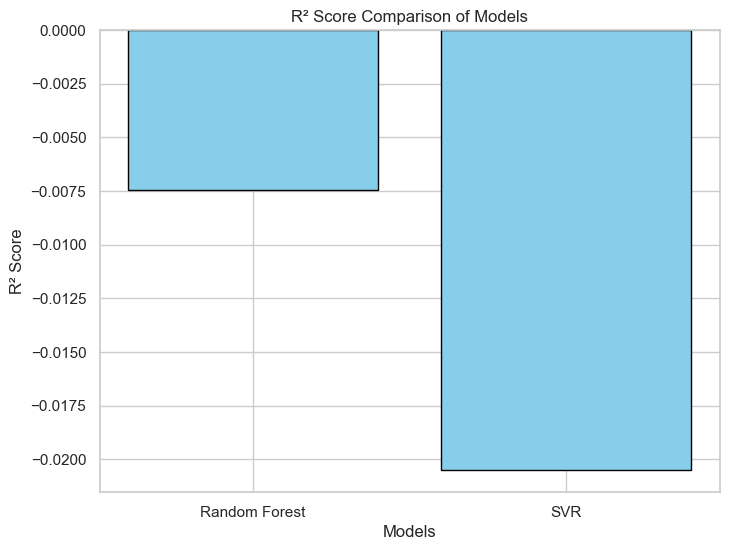

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assume Linear Regression model has already been trained as 'model'
y_pred_lr = model.predict(X_test)

# Calculate R² score for Linear Regression
r2_lr = r2_score(y_test, y_pred_lr)

# R^2 scores for all models
model_scores = {
   # 'Linear Regression': r2_lr,
    'Random Forest': r2_rf,
    'SVR': r2_svr
}

# Convert the dictionary to a list for plotting
models = list(model_scores.keys())
scores = list(model_scores.values())

# Plotting the "histogram" like bar graph
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
plt.bar(models, scores, color='skyblue', edgecolor='black')

plt.title('R² Score Comparison of Models')
plt.xlabel('Models')
plt.ylabel('R² Score')

#plt.ylim()  # R^2 score ranges from 0 to 1
plt.show()


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.animation import FuncAnimation

# Assume the R² scores are already calculated
model_scores = {
    'Random Forest': r2_rf,
    'SVR': r2_svr
}

# Convert the dictionary to a list for plotting
models = list(model_scores.keys())
scores = list(model_scores.values())

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(models, [0] * len(models), color='skyblue', edgecolor='black')

# Title and labels
ax.set_title('R² Score Comparison of Models')
ax.set_xlabel('Models')
ax.set_ylabel('R² Score')
#ax.set_ylim(0, 1)  # Set the y-axis limit from 0 to 1

# Function to animate the bars
def animate(frame):
    for i, bar in enumerate(bars):
        bar.set_height(scores[i] * (frame / 100))

# Create the animation
anim = FuncAnimation(fig, animate, frames=np.arange(0, 101, 2), interval=50)

# Show the animation
plt.show()


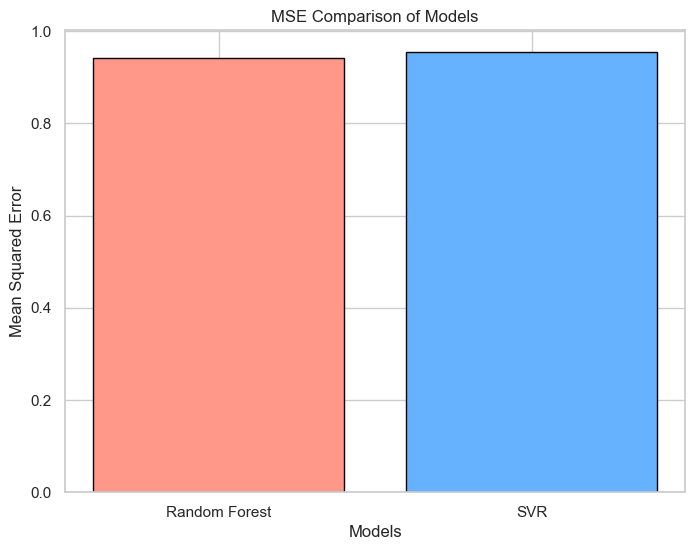

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assume Linear Regression model has already been trained as 'model'
y_pred_lr = model.predict(X_test)

# Calculate MSE for each model
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_svr = mean_squared_error(y_test, y_pred_svr)

# MSE scores for all models
model_mse = {
    #'Linear Regression': mse_lr,
    'Random Forest': mse_rf,
    'SVR': mse_svr
}

# Convert the dictionary to a list for plotting
models = list(model_mse.keys())
mse_values = list(model_mse.values())
colors = ['#FF9889', '#66B2FF']
# Plotting the bar graph with color
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
plt.bar(models, mse_values, color=colors, edgecolor='black')

plt.title('MSE Comparison of Models')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.show()


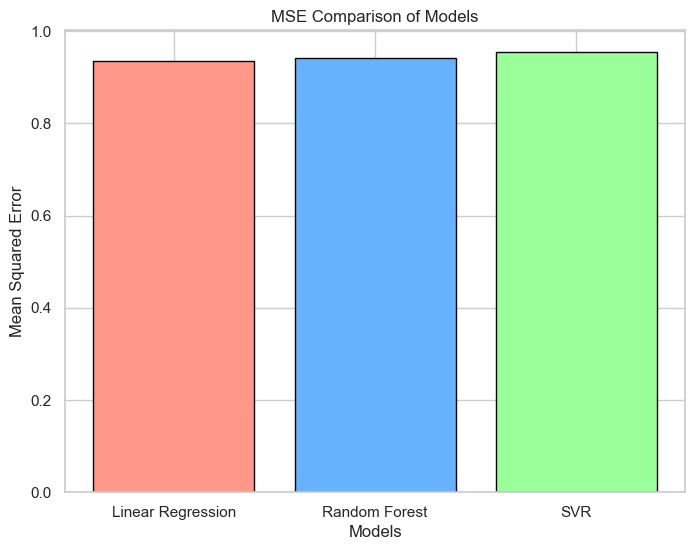

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assume Linear Regression model has already been trained as 'model'
y_pred_lr = model.predict(X_test)

# Calculate MSE for each model
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_svr = mean_squared_error(y_test, y_pred_svr)

# MSE scores for all models
model_mse = {
    'Linear Regression': mse_lr,
    'Random Forest': mse_rf,
    'SVR': mse_svr
}

# Convert the dictionary to a list for plotting
models = list(model_mse.keys())
mse_values = list(model_mse.values())

# Assign different colors for each bar
colors = ['#FF9889', '#66B2FF', '#99FF99']  # Red, Blue, Green

# Plotting the bar graph with different colors for each bar
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
plt.bar(models, mse_values, color=colors, edgecolor='black')

plt.title('MSE Comparison of Models')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.show()
